# SETUP

In [1]:
from typing import List
import unicodedata
import re

import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib default plotting styles
plt.rc("patch", edgecolor="black", force_edgecolor=True)
plt.rc("axes", grid=True)
plt.rc("grid", linestyle=":", linewidth=0.8, alpha=0.7)
plt.rc("axes.spines", right=False, top=False)
plt.rc("figure", figsize=(11, 8))
plt.rc("font", size=12.0)
plt.rc("hist", bins=25)

def clean(text: str) -> List[str]:
    "a simple function to prepare text data"
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words("english") + ["r", "u", "2", "ltgt"]
    text = (
        unicodedata.normalize("NFKD", text)
        .encode("ascii", "ignore")
        .decode("utf-8", "ignore")
        .lower()
    )
    words = re.sub(r"[^\w\s]", "", text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

df = pd.read_csv("spam_clean.csv")

In [3]:
df.head()

label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [4]:
df.shape

(5572, 2)

In [5]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [6]:
df.text

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
5       FreeMsg Hey there darling it's been 3 week's n...
6       Even my brother is not like to speak with me. ...
7       As per your request 'Melle Melle (Oru Minnamin...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
10      I'm gonna be home soon and i don't want to tal...
11      SIX chances to win CASH! From 100 to 20,000 po...
12      URGENT! You have won a 1 week FREE membership ...
13      I've been searching for the right words to tha...
14                    I HAVE A DATE ON SUNDAY WITH WILL!!
15      XXXMobileMovieClub: To use your credit, click ...
16                             Oh k...i'm watching here:)
17      Eh u r

## Percentage of spam in all data

n   percent
ham   4825  0.865937
spam   747  0.134063

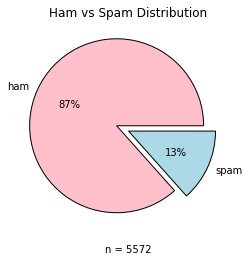

In [7]:
df.label.value_counts().plot.pie(
    colors=["pink", "lightblue"], explode=(0.15, 0), autopct="%.0f%%"
)
plt.title("Ham vs Spam Distribution")
plt.ylabel("")
plt.xlabel("n = %d" % df.shape[0])

pd.concat(
    [df.label.value_counts(), df.label.value_counts(normalize=True)], axis=1
).set_axis(["n", "percent"], axis=1, inplace=False)

## Term Frequency

In [8]:
pd.Series(" ".join(df.text).split()).value_counts()

to                      2134
you                     1622
I                       1466
a                       1327
the                     1197
and                      857
in                       798
is                       781
i                        742
u                        692
for                      644
my                       628
of                       591
your                     560
me                       557
on                       487
have                     474
2                        453
that                     421
it                       396
are                      396
call                     376
or                       373
be                       362
at                       359
with                     349
not                      340
will                     330
get                      326
can                      304
                        ... 
responsibilities.          1
chosen                     1
appear                     1
chikku..simple

- filter spam, and non-spam by masking df
- use .join() to convert qualified df.text into corresponding string

In [9]:
all_text = " ".join(df.text)
spam_text = " ".join(df[df.label == "spam"].text)
ham_text = " ".join(df[df.label == "ham"].text)

In [10]:
all_text

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s U dun say so early hor... U c already then say... Nah I don\'t think he goes to usf, he lives around here though FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv Even my brother is not like to speak with me. They treat me like aids patent. As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more?

- Cleaning data using pre-built clean function
- end product is a list with individual words in string format

In [11]:
all_words = clean(all_text)
spam_words = clean(spam_text)
ham_words = clean(ham_text)

In [13]:
all_words

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'oni',
 'free',
 'entry',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'questionstd',
 'txt',
 'ratetcs',
 'apply',
 '08452810075over18s',
 'dun',
 'say',
 'early',
 'hor',
 'c',
 'already',
 'say',
 'nah',
 'dont',
 'think',
 'go',
 'usf',
 'life',
 'around',
 'though',
 'freemsg',
 'hey',
 'darling',
 '3',
 'week',
 'word',
 'back',
 'id',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'a150',
 'rcv',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'caller',
 'press',
 '9',
 'copy',
 'friend',
 'callertune',
 'winner',
 'valued',
 'network',
 'cu

Count frequency of words in different subset of data

In [12]:
all_freq = pd.Series(all_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
ham_freq = pd.Series(ham_words).value_counts()

In [15]:
all_freq

call               600
im                 462
get                397
ur                 384
go                 304
4                  287
dont               279
ok                 277
free               275
know               267
come               247
like               245
day                241
got                238
ill                237
good               235
time               232
text               214
want               213
love               203
send               190
need               182
one                180
going              171
today              169
txt                163
home               162
lor                160
see                157
sorry              156
                  ... 
mquiz                1
09066649731from      1
relaxing             1
eand                 1
entropication        1
phil                 1
08719899230          1
edition              1
gate                 1
09071517866          1
z                    1
1230                 1
gravy      

In [16]:
tf = (
    pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
    .rename(columns={0: "all", 1: "ham", 2: "spam"})
    .fillna(0)
    .apply(lambda col: col.astype(int))
)

Text(0.5, 1.0, '10 most common words in texts')

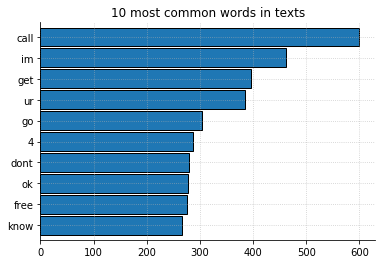

In [33]:
tf.sort_values(by='all')['all'].tail(10).plot.barh(width=.9)
plt.title('10 most common words in texts')

Text(0.5, 1.0, '10 most common words in spam texts')

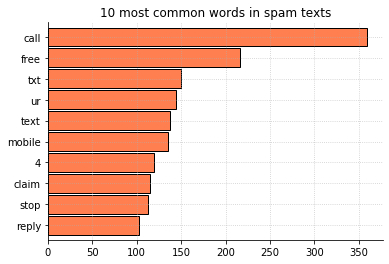

In [34]:
tf.sort_values(by='spam')['spam'].tail(10).plot.barh(width=.9, color = 'coral')
plt.title('10 most common words in spam texts')

Text(0.5, 1.0, '10 most common words in non-spam texts')

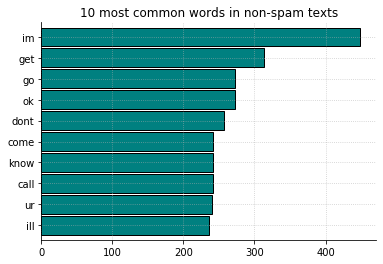

In [32]:
tf.sort_values(by = 'ham')['ham'].tail(10).plot.barh(width = .9, color = 'teal')
plt.title('10 most common words in non-spam texts')

## Ngrams
- bigrams + viz most frequent for all, spam, ham
- trigrams, etc